In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows: 
 
Data Set Information: 
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
train_set.columns = col_labels 
test_set.columns = col_labels

In [6]:
train_set.shape

(32561, 15)

In [7]:
test_set.shape

(16281, 15)

In [8]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [10]:
train_set.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [11]:
test_set.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

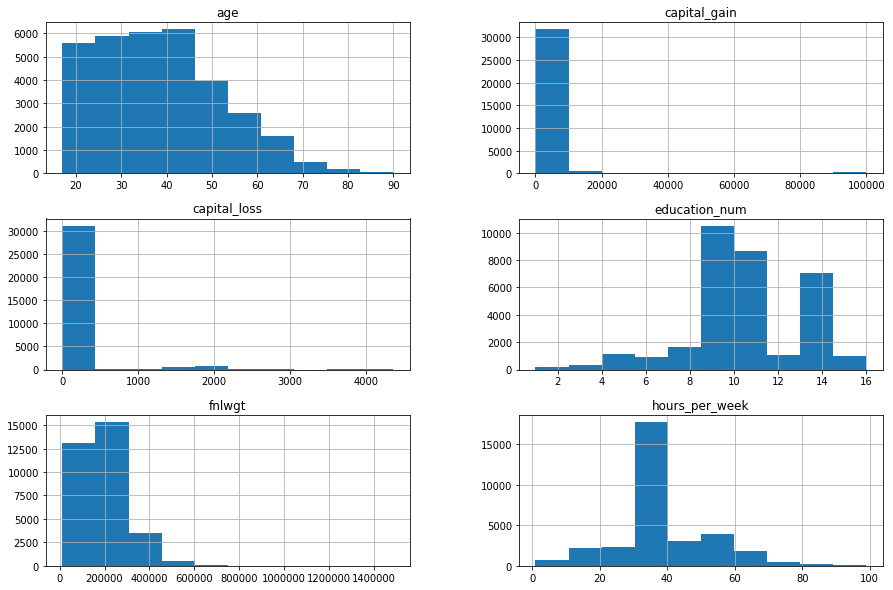

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(figsize=(15,10))
plt.show()

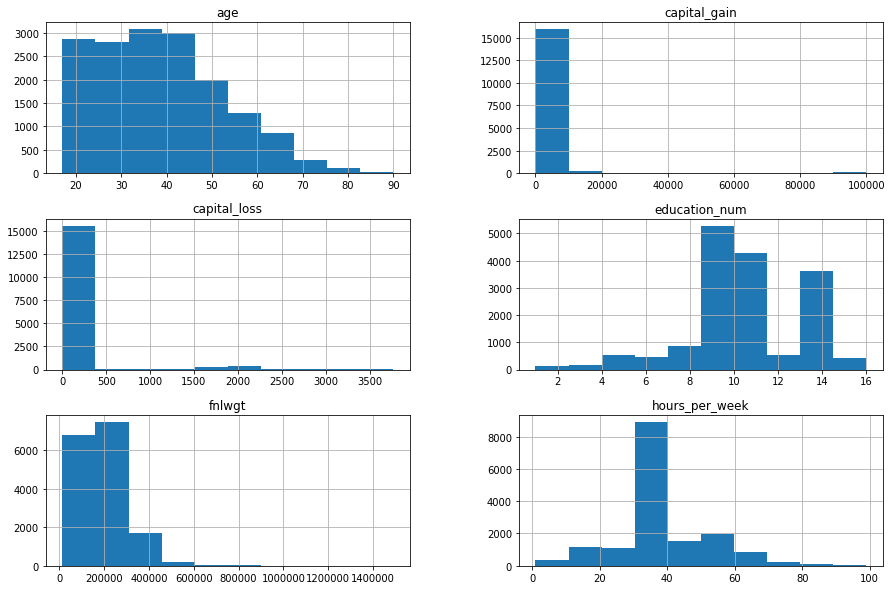

In [13]:
test_set.hist(figsize=(15,10))
plt.show()

Fix the junk data

In [14]:
train_set.replace(' ?', np.nan).dropna().shape

(30162, 15)

In [15]:
test_set.replace(' ?', np.nan).dropna().shape

(15060, 15)

In [16]:
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()

In [17]:
train_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
test_nomissing.wage_class.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [19]:
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [20]:
test_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [21]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [22]:
combined_set.shape

(45222, 15)

In [23]:
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [24]:
combined_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [25]:
final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [26]:
final_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [27]:
final_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [41]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null int8
fnlwgt            30162 non-null int64
education         30162 non-null int8
education_num     30162 non-null int64
marital_status    30162 non-null int8
occupation        30162 non-null int8
relationship      30162 non-null int8
race              30162 non-null int8
sex               30162 non-null int8
capital_gain      30162 non-null int64
capital_loss      30162 non-null int64
hours_per_week    30162 non-null int64
native_country    30162 non-null int8
dtypes: int64(6), int8(8)
memory usage: 1.8 MB


In [43]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 14 columns):
age               15060 non-null int64
workclass         15060 non-null int8
fnlwgt            15060 non-null int64
education         15060 non-null int8
education_num     15060 non-null int64
marital_status    15060 non-null int8
occupation        15060 non-null int8
relationship      15060 non-null int8
race              15060 non-null int8
sex               15060 non-null int8
capital_gain      15060 non-null int64
capital_loss      15060 non-null int64
hours_per_week    15060 non-null int64
native_country    15060 non-null int8
dtypes: int64(6), int8(8)
memory usage: 941.2 KB


                     age  workclass    fnlwgt  education  education_num  \
age             1.000000   0.080540 -0.076511  -0.001111       0.043526   
workclass       0.080540   1.000000 -0.032493   0.017855       0.037833   
fnlwgt         -0.076511  -0.032493  1.000000  -0.027102      -0.044992   
education      -0.001111   0.017855 -0.027102   1.000000       0.345410   
education_num   0.043526   0.037833 -0.044992   0.345410       1.000000   
marital_status -0.276373  -0.034241  0.032163  -0.040664      -0.063419   
occupation     -0.005682   0.015572  0.000204  -0.038212       0.087717   
relationship   -0.246456  -0.067417  0.009298  -0.012717      -0.091935   
race            0.023374   0.044731 -0.023895   0.011154       0.032805   
sex             0.081993   0.074973  0.025362  -0.027888       0.006157   
capital_gain    0.080154   0.035350  0.000422   0.030575       0.124416   
capital_loss    0.060165   0.007204 -0.009750   0.015028       0.079646   
hours_per_week  0.101599 

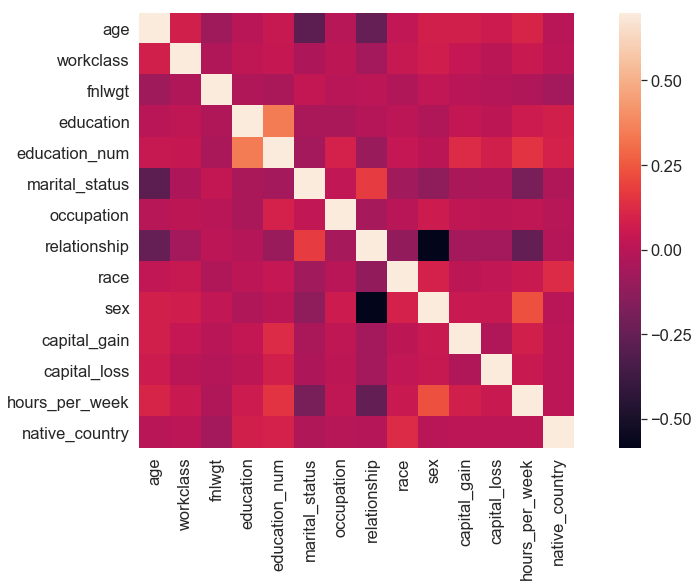

In [42]:
# Check the correlation between the different attributes. 

matrix = final_train.corr()
print(matrix)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(matrix, vmax=0.7, square=True)

XGBOOST

In [29]:
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

In [30]:
import xgboost as xgb

C:\Users\MOHAN\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [31]:
# Set the parameters for the XGBoost. 

params = {
    'objective':'binary:logistic',
    'max_depth':3,
    'silent':1,
    'eta':0.5
}
num_rounds = 400

In [32]:
# Create DMatrix for train and test

dtrain=xgb.DMatrix(final_train,y_train) 
dtest=xgb.DMatrix(final_test,y_test)

In [33]:
print("Train possible labels: ")
print(np.unique(dtrain.get_label()))
print("Test possible labels: ")
print(np.unique(dtest.get_label()))

Train possible labels: 
[ 0.  1.]
Test possible labels: 
[ 0.  1.]


In [34]:
# Train the algorithm

bst=xgb.train(params,dtrain,num_rounds)

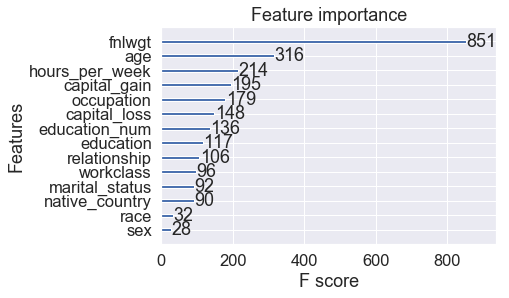

In [35]:
# FInd the importance of the different attributes on the salary. 
sns.set(font_scale = 1.5)
xgb.plot_importance(bst)

In [36]:
# Create the predictions for the test data

preds_prob = bst.predict(dtest)
preds_prob

array([ 0.00240698,  0.1397436 ,  0.27742353, ...,  0.84842193,
        0.06890751,  0.7116856 ], dtype=float32)

In [37]:
# Check if the test predictions were good. Get the error and accuracy of the prediction.  

labels = dtest.get_label()
preds = preds_prob > 0.5 # threshold
correct = 0
for i in range(len(preds)):
    if (labels[i] == preds[i]):
        correct += 1
print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-correct/len(preds)))
print('Accuracy: {0:.4f}'.format(correct/len(preds)))

Predicted correctly: 13043/15060
Error: 0.1339
Accuracy: 0.8661
